## Problem Statement


The problem statement for this project is to build a predictive model to forecast the sales of each product at a particular store. The dataset contains sales data for 1559 products across 10 stores in different cities. The objective is to identify the key properties of products and stores that influence sales and to develop a model that can accurately predict sales based on these properties. The data contains missing values and will require pre-processing and feature engineering to prepare it for modeling.
The business problem that this project aims to solve is to help BigMart better understand the properties of products and stores that play a key role in increasing sales. This understanding will enable them to optimize their inventory, pricing, and marketing strategies to increase sales and revenue.


## Hypothesis Generation

- Stores with more promotional events will have higher sales than stores with fewer promotions.
- Products with higher MRP (Maximum Retail Price) will have lower sales due to customers' price sensitivity.
- Stores with larger sizes will have higher sales than smaller stores.
- Products with higher visibility on the store shelves will sell more.
- Products with higher weight or volume will sell less due to higher shipping costs.
- Stores located in urban areas will have higher sales than stores in rural areas.


## Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import joblib



In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
test_data = pd.read_csv( "/content/drive/MyDrive/Dataset/Test.csv")
train_data = pd.read_csv("/content/drive/MyDrive/Dataset/Train.csv")

## Basic Data Exploration

In [5]:
 train_data.shape

(8523, 12)

In [6]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis(EDA)


In [9]:
# check unique values in dataset
unique_counts = train_data.nunique()
print(unique_counts)

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


### Handling null values


In [10]:
# Check for null values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

2 fields have a lot of missing values: [Item_Weight, Outlet_Size]

In [11]:
# Percentage of null values
train_data.isnull().sum()/train_data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

So, we have 17% and 28% null values in [Item_Weight, Outlet_Size] in order.

In [12]:
# Transforming ['Item_Wieght'] null values
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

As our data in this field is numeric, we use mean() to deal with null values

In [13]:
# Transforming ['Outlet_Size'] null values
train_data['Outlet_Size'] =  train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

As our data in this field is categorical, we use mode() to deal with null values

In [14]:
# Check for null values
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Handling missing values


In [15]:
# check for missing values in the dataset
for column in train_data:
    nulls = sum(train_data[column]==0)
    print(f"{column}: {nulls}")


Item_Identifier: 0
Item_Weight: 0
Item_Fat_Content: 0
Item_Visibility: 526
Item_Type: 0
Item_MRP: 0
Outlet_Identifier: 0
Outlet_Establishment_Year: 0
Outlet_Size: 0
Outlet_Location_Type: 0
Outlet_Type: 0
Item_Outlet_Sales: 0


Seems like ['Item_Visibility'] needs some work.

In [16]:
# Transforming ['Item_Wieght'] null values
train_data['Item_Visibility'].fillna(train_data['Item_Visibility'].mean(), inplace=True)


inplace=True, will keep the changes in the dataframe.

In [17]:
# get unique values in categorical columns
for column in train_data.select_dtypes(include='object'):
    print(column, train_data[column].unique())

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size ['Medium' 'High' 'Small']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Field ['Item_Fat_Content'] in need to be cleaned.

In [18]:
train_data['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)

In [19]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Handling duplicates

In [20]:
# Check for duplicates
train_data.duplicated().sum()

0

### Checking the outliers

<Axes: xlabel='Item_Weight'>

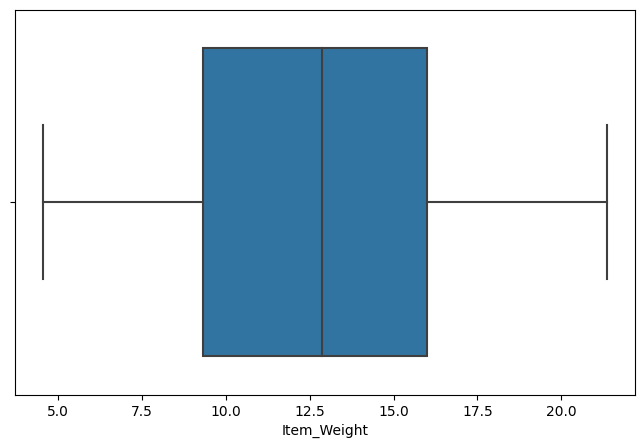

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train_data['Item_Weight'])

Since these columns do not contain any meaningful categorical data, they should not be included in the list of categorical columns.

### Univariate Analysis

#### Numerical columns

In [22]:
# Calculate mean, median, and standard deviation
train_data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


###### Item_Weight

array([[<Axes: title={'center': 'Item_Weight'}>]], dtype=object)

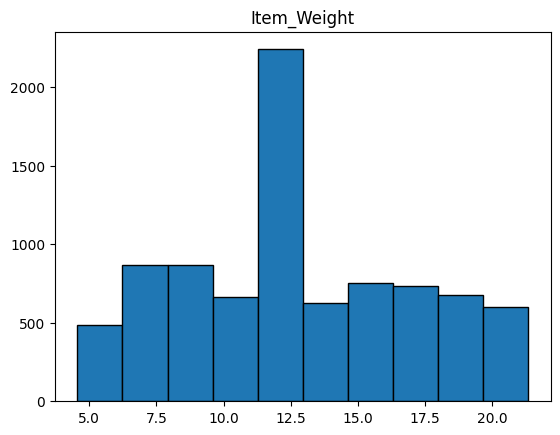

In [23]:
# Create a histogram of a variable
train_data.hist(column='Item_Weight', grid=False, edgecolor='black')

Higher mean value of 12.5 is observed

<Axes: xlabel='Item_Weight', ylabel='Density'>

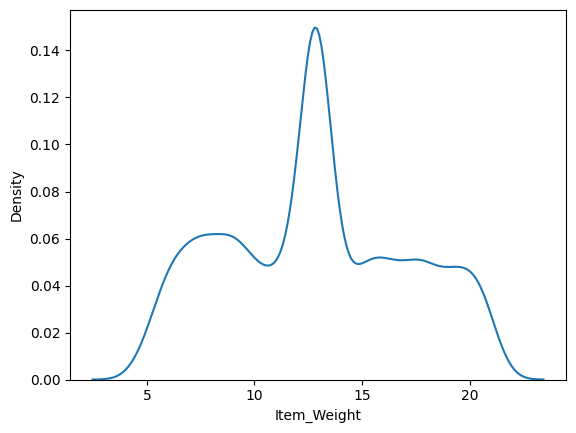

In [24]:
# Create a density curve of a variable
sns.kdeplot(train_data['Item_Weight'])

###### Item_Visibility

array([[<Axes: title={'center': 'Item_Visibility'}>]], dtype=object)

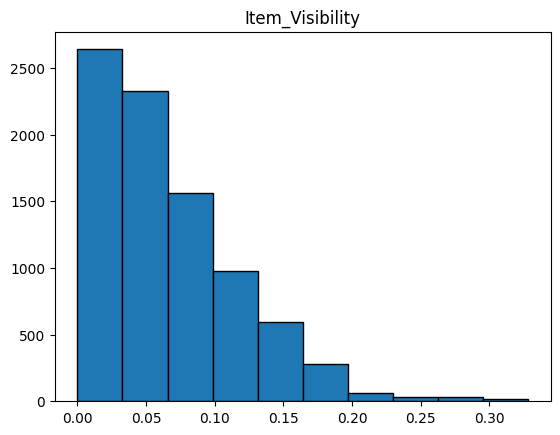

In [25]:
# Create a histogram of a variable
train_data.hist(column='Item_Visibility', grid=False, edgecolor='black')

<Axes: xlabel='Item_Visibility', ylabel='Density'>

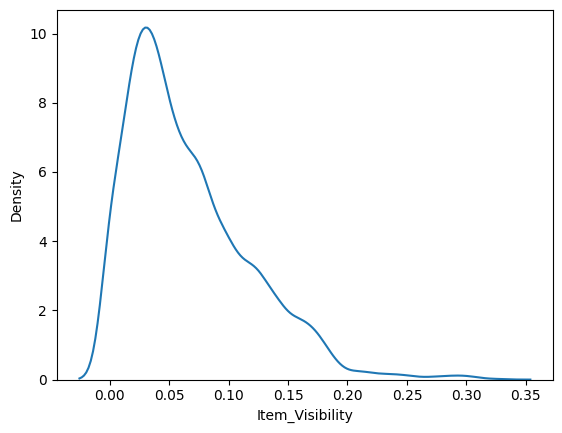

In [26]:
# Create a density curve of a variable
sns.kdeplot(train_data['Item_Visibility'])

A Right-skewed curve is observed

###### Item_MRP

array([[<Axes: title={'center': 'Item_MRP'}>]], dtype=object)

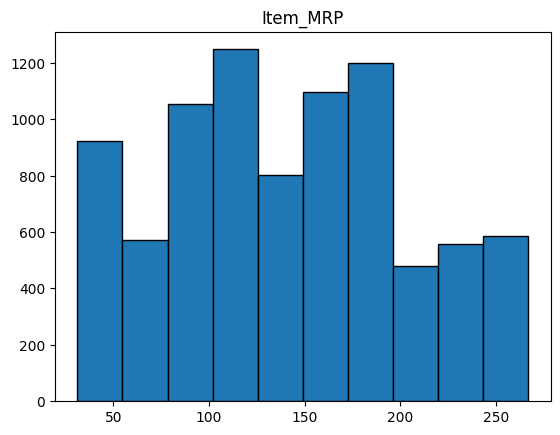

In [27]:
train_data.hist(column = 'Item_MRP', grid = False, edgecolor = 'black')

<Axes: xlabel='Item_MRP', ylabel='Density'>

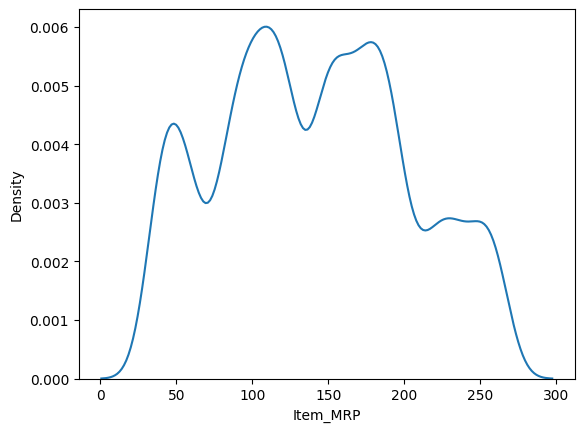

In [28]:
sns.kdeplot(train_data['Item_MRP'])

4 Peak values are observed

#### Item_Outlet_Sales

array([[<Axes: title={'center': 'Item_Outlet_Sales'}>]], dtype=object)

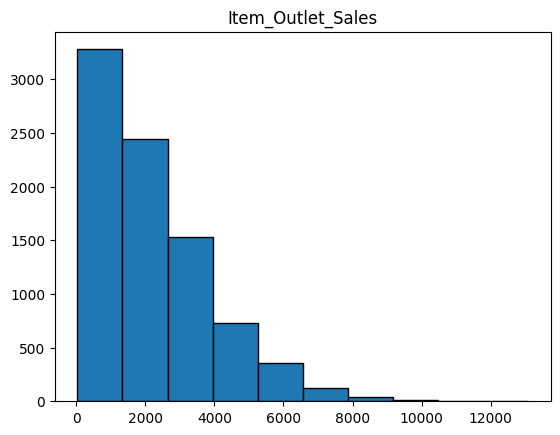

In [29]:
train_data.hist(column = 'Item_Outlet_Sales', grid = False, edgecolor = 'black')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

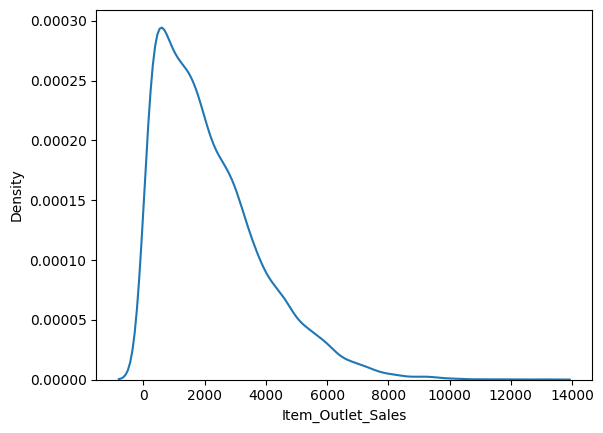

In [30]:
sns.kdeplot(train_data['Item_Outlet_Sales'])

A right-skewed curve is observed.
It needs to be normalized

After applying the transformation, the data will be more symmetric and the effect of extreme values will be reduced.

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

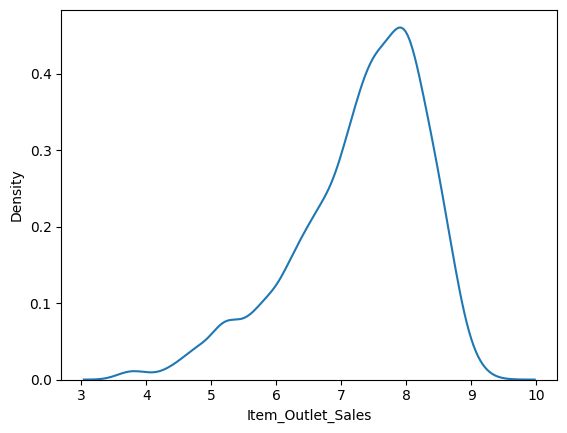

In [31]:
# log transformation
train_data['Item_Outlet_Sales'] = np.log(1+train_data['Item_Outlet_Sales'])
sns.kdeplot(train_data['Item_Outlet_Sales'])

The curve is normalized.

#### Categorical columns


#### Item_Fat_Content

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

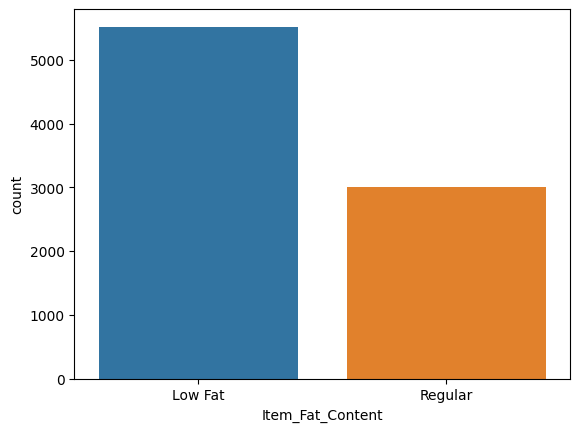

In [32]:
sns.countplot(x='Item_Fat_Content', data=train_data)

Observation: Most of items are Low-Fat. I guess it maybe fruits!

#### Item_Type

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

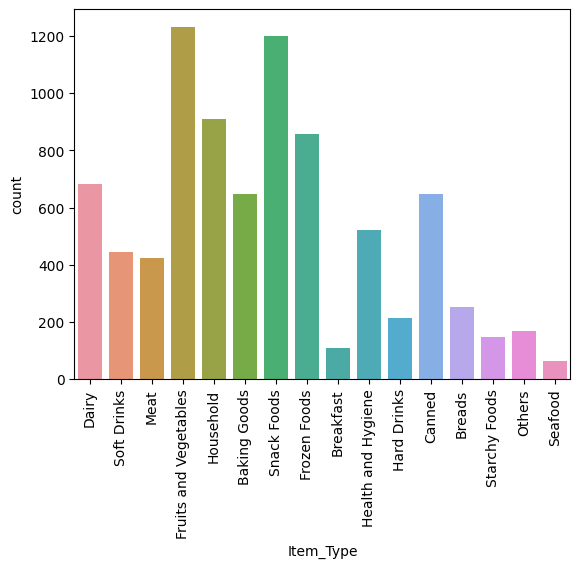

In [33]:
graph = sns.countplot(x='Item_Type', data=train_data)
graph.set_xticklabels(labels=train_data['Item_Type'].unique(), rotation=90)


chart.set_xticklabels() is to display the labels in a vertical manner as shown in the graph.

#### Outlet_Establishment_Year


<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

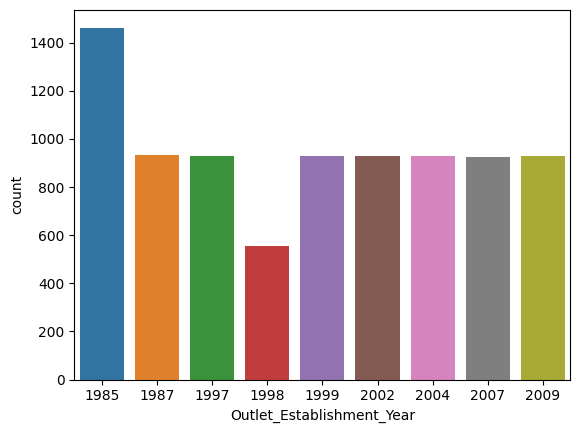

In [34]:
sns.countplot(x='Outlet_Establishment_Year', data=train_data)

#### Outlet_Size

<Axes: xlabel='Outlet_Size', ylabel='count'>

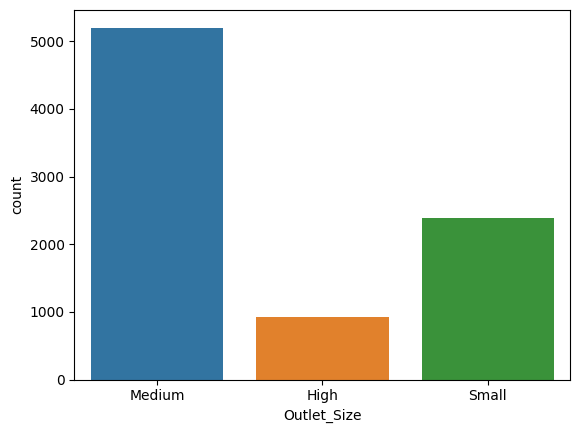

In [35]:
sns.countplot(x='Outlet_Size', data=train_data)


#### Outlet_Location_Type

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

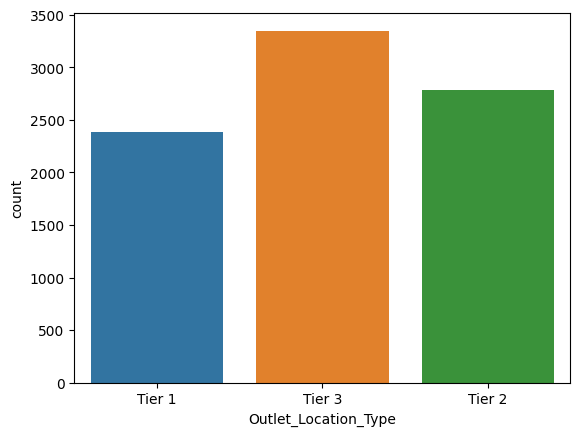

In [36]:
sns.countplot(x='Outlet_Location_Type', data=train_data)

#### Outlet_Type

[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

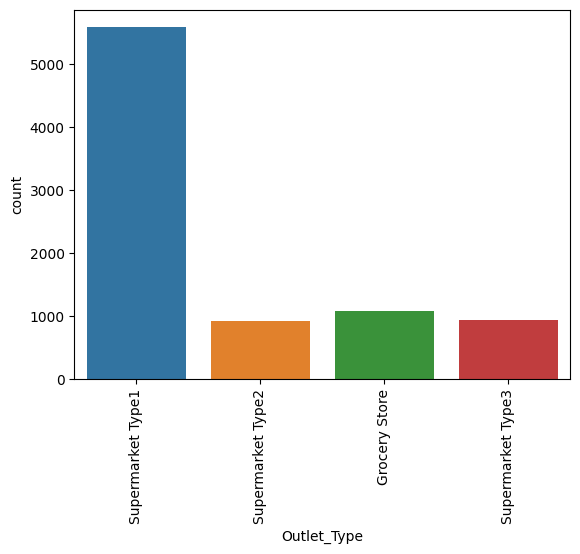

In [37]:
graph = sns.countplot(x='Outlet_Type', data=train_data)
graph.set_xticklabels(labels=train_data['Outlet_Type'].unique(), rotation=90)


### Bivariate Analysis

##### Correlation Matrix
A table that shows the correlation coefficients between different variables. The correlation coefficient measures the strength and direction of the relationship between two variables.

<Axes: >

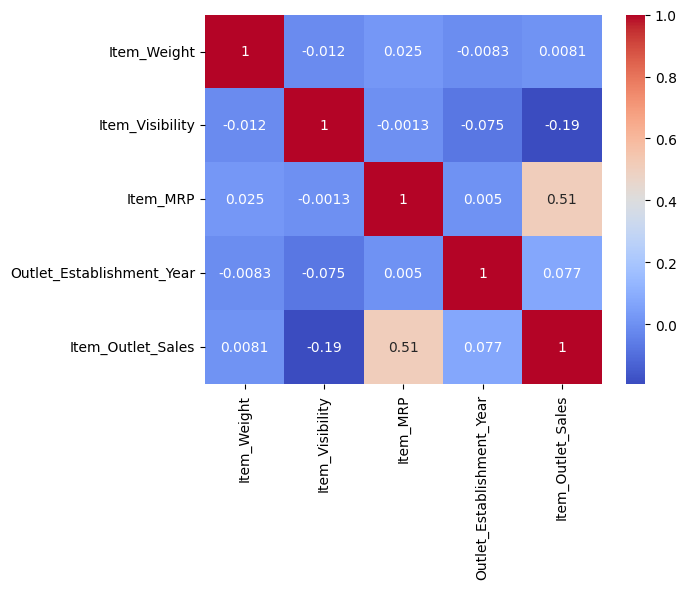

In [38]:
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Observations:

- It's observed that a positive correlation is between 'Item_MRP' and 'Item_Outlet_Sales'.
- It's observed that a good positive correlation is between 'Item_MRP' and 'Item_Weight'.
- It's observed that a positive correlation is between 'Outlet_Establishment_Year' and 'Item_Outlet_Sales'.


## Encoding Categorical Variables

#### Label Encoding

Label encoding is simply converting each value in a column to a number.

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = train_data.select_dtypes(include=['object']).columns

# Select all categorical columns
train_data[cat_cols] = train_data[cat_cols].apply(lambda x: le.fit_transform(x))


We access each column from the 'cat col' list. For the corresponding column.

#### One Hot Encoding
creates a binary vector for each category.

In [40]:
#train_data = pd.get_dummies(train_data, columns=cat_cols)

get_dummies is a pandas method that creates binary vectors for each category in a categorical column. It is a simpler and more efficient way to handle categorical data

In [41]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,8.225808
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,6.096776
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,7.648868
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,6.597664
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,6.903451


In [42]:
train_data.shape

(8523, 12)

## Splitting the data for Training and Testing


In [43]:
# Split the data into training and testing sets
x = train_data.drop(columns=['Item_Outlet_Sales'])
y = train_data['Item_Outlet_Sales']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [45]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (7244, 11)
Shape of testing feature: (1279, 11)
Shape of training label: (7244,)
Shape of training label: (1279,)


### Standrization

In [46]:
Scaler = StandardScaler()
Scaler.fit(x_train)

StandardScaler()

In [47]:
x_train = Scaler.transform(x_train)
x_test = Scaler.transform(x_test)

In [48]:
x_train

array([[-1.37185899, -1.36312063, -0.74174247, ...,  1.383549  ,
        -0.14566957, -0.2585895 ],
       [-0.65108659, -0.5233824 ,  1.34817681, ..., -0.28463159,
        -1.37841531, -0.2585895 ],
       [ 0.97567217, -0.84035401, -0.74174247, ...,  1.383549  ,
        -1.37841531, -0.2585895 ],
       ...,
       [ 1.52238807,  1.12061215, -0.74174247, ..., -0.28463159,
        -0.14566957, -0.2585895 ],
       [-0.38553886,  1.77111359, -0.74174247, ..., -0.28463159,
        -0.14566957, -0.2585895 ],
       [ 1.4108134 ,  0.82492968, -0.74174247, ...,  1.383549  ,
        -1.37841531, -0.2585895 ]])

## Modeling

In [49]:
models = {
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [50]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'MSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')
    print('-'*30)

Using model: LR
MSE Score: 0.6456437615049082
Training Accuracy: 0.5896855848143949
Testing Accuracy: 0.6153518949539355
------------------------------
Using model: RF
MSE Score: 0.5457725735283836
Training Accuracy: 0.9583223285814356
Testing Accuracy: 0.7251466123710315
------------------------------
Using model: XGBR
MSE Score: 0.5535617771128479
Training Accuracy: 0.8903903053298322
Testing Accuracy: 0.7172452763281453
------------------------------


The best models' results is <b>XGboost<b></b>

### XGboost

In [51]:
model = XGBRegressor()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Accurcy

print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')

Training Accuracy: 0.8903903053298322
Testing Accuracy: 0.7172452763281453


#### Cross Validation


In [52]:
c_val = cross_validate(model, x_train, y_train, cv = 20, scoring = 'r2')

In [53]:
c_val

{'fit_time': array([0.52207994, 0.51285768, 0.50580192, 0.50185657, 0.51033545,
        0.51673532, 0.51199341, 1.08169723, 1.10817528, 1.05954838,
        0.51623225, 0.50586796, 0.64425373, 0.50711489, 0.50561047,
        2.43860126, 0.50640154, 0.4912107 , 0.51340795, 0.49041057]),
 'score_time': array([0.00241756, 0.00213933, 0.00229216, 0.00228143, 0.00222754,
        0.00289178, 0.00250363, 0.0022738 , 0.00287819, 0.00231981,
        0.0020628 , 0.00215077, 0.00228262, 0.00209188, 0.00213599,
        0.0021534 , 0.00223303, 0.00208926, 0.00219774, 0.00213194]),
 'test_score': array([0.68265138, 0.65837717, 0.71271314, 0.7197754 , 0.72692332,
        0.73674757, 0.63092423, 0.64920749, 0.69696258, 0.68373544,
        0.69995874, 0.67033214, 0.69390524, 0.66189572, 0.71614969,
        0.72011912, 0.71460435, 0.67974539, 0.66363016, 0.72429492])}

In [54]:
c_val['test_score'].mean()

0.6921326587762963

The best accuracy for <b>XGboost <b> model is <b> 90 %</b>